<a href="https://colab.research.google.com/github/hamk3010/Reinforcement-Learning/blob/master/Dopamine_randomAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install necessary packages 
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

     |████████████████████████████████| 61kB 2.5MB/s 
  Created wheel for dopamine-rl: filename=dopamine_rl-2.0.5-cp36-none-any.whl size=76297 sha256=c28a9c3aea1dc7642df8a6b0705a666c1beadaabbf9a651afd294a5e760ecc8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2k65kzn8/wheels/75/01/fa/43ebcfe0f37d8c27bb1b7b6fa213caa0340e783fe754a2af8f
Successfully built dopamine-rl
  Found existing installation: dopamine-rl 1.0.5
    Uninstalling dopamine-rl-1.0.5:
      Successfully uninstalled dopamine-rl-1.0.5


In [0]:
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import atari_lib
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

BASE_PATH= '/tmp/colab_dope_run'
GAME = 'Asterix'

In [0]:
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [30]:
# Create a new agent from scratch
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):

  def __init__(self, sess, num_actions, switch_prob= 0.1):
    self._sess = sess
    self._num_actions = num_actions
    self._switch_prob = switch_prob
    self._last_action = np.random.randint(num_actions)
    self.eval_mode = False
  
  def _choose_action(self):
    # Our policy 
    if np.random.random() <= self._switch_prob:
      self.__last_action = np.random.randint(self._num_actions)
    return self._last_action
  
  def step(self, reward, observation):
    return self._choose_action()

  def bundle_and_checkpoint(self, ununsed_checkpoint_dir, unused_iteration):
    pass

  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version, unused_data):
    pass

  def begin_episode(self, unused_observation):
    return self._choose_action()

  def end_episode(self, unused_reward):
    pass

  def step(self, reward, observation):
    return self._choose_action()

def create_basic_agent(sess, environment, summary_writer= None):
  return BasicAgent(sess, num_actions= environment.action_space.n, switch_prob = 0.2)


basic_agent_config = """
import dopamine.discrete_domains.atari_lib
import dopamine.discrete_domains.run_experiment
atari_lib.create_atari_environment.game_name = '{}'
atari_lib.create_atari_environment.sticky_actions = True
run_experiment.Runner.num_iterations = 200
run_experiment.Runner.training_steps = 10
run_experiment.Runner.max_steps_per_episode = 100
""".format(GAME)
gin.parse_config(basic_agent_config, skip_unknown=False)
basic_runner = run_experiment.TrainRunner(LOG_PATH,
                                      create_basic_agent)



INFO:tensorflow:Creating TrainRunner ...


In [31]:
print('Will train agent, please be patient, may be a while...')
basic_runner.run_experiment()
print('Done training!')

Will train agent, please be patient, may be a while...
INFO:tensorflow:Beginning training...
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 593.00


INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 521.21
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 574.49
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 552.65
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 580.08

INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 546.50
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 5

In [32]:
# Loading Training Logs
basic_runner_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
basic_runner_data['agent'] = 'basicAgent'
basic_runner_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_runner_data,
                                                        how='outer')

Reading statistics from: /tmp/colab_dope_run/basic_agent/Asterix//logs/log_199


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


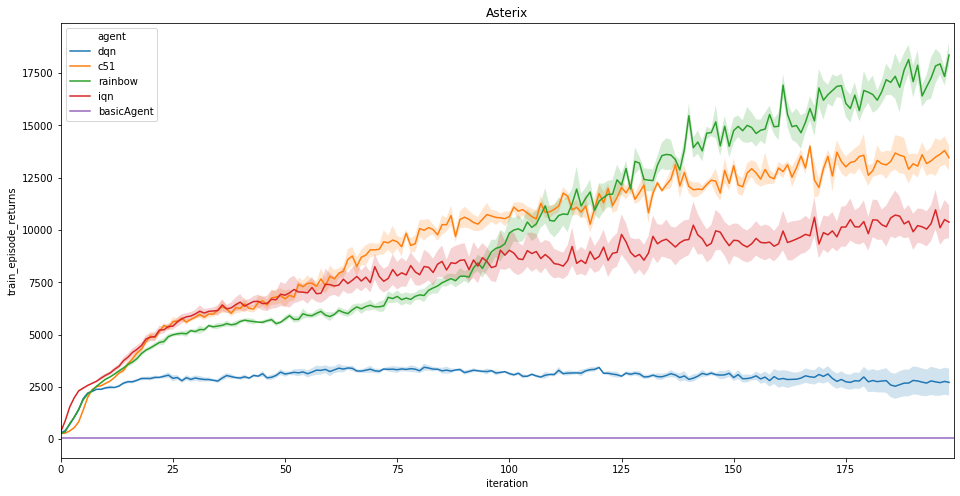

In [33]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()